In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Dataset/blkjckhands.csv")
df.head()

,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,0,Player1,7,10,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
1,1,Player2,10,9,0,0,0,19,10,8,...,0,0,18,nowin,Win,Plwin,Beat,20,0,19
2,2,Player3,9,8,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
3,3,Player4,2,10,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
4,4,Player5,10,2,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12


In [ ]:
df.drop(['PlayerNo', 'Unnamed: 0'],axis=1,inplace=True)
df

,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,7,10,0,0,0,17,10,8,0,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
1,10,9,0,0,0,19,10,8,0,0,0,18,nowin,Win,Plwin,Beat,20,0,19
2,9,8,0,0,0,17,10,8,0,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
3,2,10,0,5,0,17,10,8,0,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
4,10,2,0,5,0,17,10,8,0,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,10,7,0,0,0,17,3,9,4,2,0,18,nowin,Loss,Beat,Dlwin,0,10,17
899996,6,1,10,0,0,17,3,9,4,2,0,18,nowin,Loss,Beat,Dlwin,0,10,7
899997,4,2,9,0,0,15,3,9,4,2,0,18,nowin,Loss,Beat,Dlwin,0,10,6
899998,9,10,0,0,0,19,3,9,4,2,0,18,nowin,Win,Plwin,Beat,20,0,19


In [ ]:
df.shape

(900000, 19)

In [ ]:
df.dtypes

card1           int64
card2           int64
card3           int64
card4           int64
card5           int64
sumofcards      int64
dealcard1       int64
dealcard2       int64
dealcard3       int64
dealcard4       int64
dealcard5       int64
sumofdeal       int64
blkjck         object
winloss        object
plybustbeat    object
dlbustbeat     object
plwinamt        int64
dlwinamt        int64
ply2cardsum     int64
dtype: object

In [ ]:
df.describe()

,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,dealcard4,dealcard5,sumofdeal,plwinamt,dlwinamt,ply2cardsum
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,7.126259,7.089927,1.955088,2.336462,0.389787,18.897522,7.170380,7.129867,4.391293,1.380733,0.226433,20.298707,9.723528,4.775789,14.216186
std,2.994719,3.008032,3.531830,3.657284,1.730740,3.210611,2.981575,2.990306,4.080103,3.038298,1.334263,2.556207,9.789798,4.994973,4.429873
min,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,2.000000
25%,5.000000,4.000000,0.000000,0.000000,0.000000,17.000000,5.000000,5.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,12.000000
50%,8.000000,8.000000,0.000000,0.000000,0.000000,19.000000,8.000000,8.000000,4.000000,0.000000,0.000000,20.000000,10.000000,0.000000,14.000000
75%,10.000000,10.000000,2.000000,4.000000,0.000000,21.000000,10.000000,10.000000,9.000000,0.000000,0.000000,22.000000,20.000000,10.000000,18.000000
max,11.000000,11.000000,11.000000,10.000000,10.000000,26.000000,11.000000,11.000000,11.000000,10.000000,10.000000,26.000000,25.000000,10.000000,21.000000


In [ ]:
df.isnull().sum()

card1          0
card2          0
card3          0
card4          0
card5          0
sumofcards     0
dealcard1      0
dealcard2      0
dealcard3      0
dealcard4      0
dealcard5      0
sumofdeal      0
blkjck         0
winloss        0
plybustbeat    0
dlbustbeat     0
plwinamt       0
dlwinamt       0
ply2cardsum    0
dtype: int64

In [ ]:
df['blkjck'].fillna("nowin",inplace = True)
df['winloss'].fillna("Win",inplace = True)
df['plybustbeat'].fillna("Plwin",inplace = True)
df['dlbustbeat'].fillna("Dlwin",inplace = True)

Text(0.5, 1.0, 'korelasi')

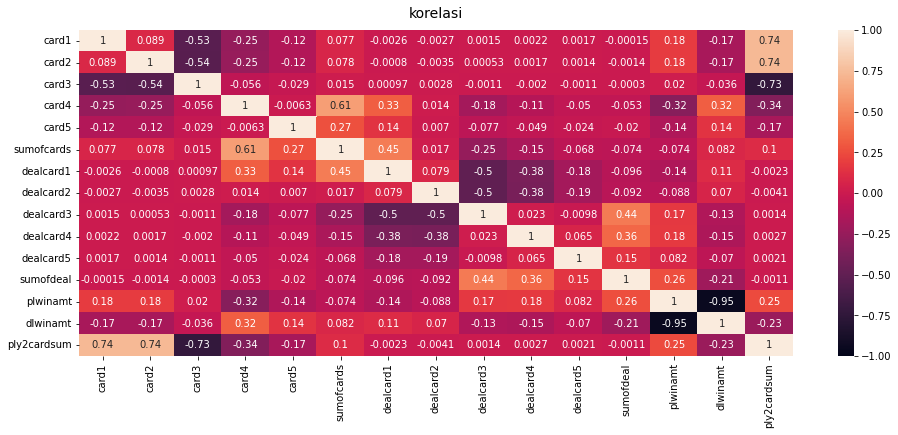

In [ ]:
#heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)
heatmap.set_title("korelasi",fontdict={"fontsize":14}, pad=12)

In [ ]:
# data modeling
df = df[["card1", "card2","card3","sumofcards","dealcard1","dealcard2","winloss"]]
df

,card1,card2,card3,sumofcards,dealcard1,dealcard2,winloss
0,7,10,0,17,10,8,Loss
1,10,9,0,19,10,8,Win
2,9,8,0,17,10,8,Loss
3,2,10,0,17,10,8,Loss
4,10,2,0,17,10,8,Loss
...,...,...,...,...,...,...,...
899995,10,7,0,17,3,9,Loss
899996,6,1,10,17,3,9,Loss
899997,4,2,9,15,3,9,Loss
899998,9,10,0,19,3,9,Win


In [ ]:
df.head()

,card1,card2,card3,sumofcards,dealcard1,dealcard2,winloss
0,7,10,0,17,10,8,Loss
1,10,9,0,19,10,8,Win
2,9,8,0,17,10,8,Loss
3,2,10,0,17,10,8,Loss
4,10,2,0,17,10,8,Loss


In [ ]:
# data unik
df.nunique(axis=0)

card1         11
card2         11
card3         12
sumofcards    19
dealcard1     11
dealcard2     11
winloss        3
dtype: int64

In [ ]:
df = pd.get_dummies(df)
df.head(100)

,card1,card2,card3,sumofcards,dealcard1,dealcard2,winloss_Loss,winloss_Push,winloss_Win
0,7,10,0,17,10,8,1,0,0
1,10,9,0,19,10,8,0,0,1
2,9,8,0,17,10,8,1,0,0
3,2,10,0,17,10,8,1,0,0
4,10,2,0,17,10,8,1,0,0
...,...,...,...,...,...,...,...,...,...
95,5,3,4,21,11,9,0,0,1
96,2,9,10,21,10,10,0,0,1
97,10,10,0,20,10,10,0,1,0
98,5,5,5,25,10,10,1,0,0


# Pemodelan

In [ ]:
# defining feature matrix(X) and response vector(y)
X = df.loc[:, df.columns != "dealcard1"]
y = df["dealcard1"]

In [ ]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
# from sklearn import linear_model
# # model dengan data 1
# reg = linear_model.LinearRegression()
# reg.fit(X_train, y_train)
 
# #coefficients
# print('Coefficients: ', reg.coef_)

# #intercept
# print('Intercept: ', reg.intercept_)


Evalution

In [ ]:
y_lr = lr.predict(X_test)
y_rf = classifier_rf.predict(X_test)
# y_pred = reg.predict(X_test)

In [ ]:
X_test

,card1,card2,card3,sumofcards,dealcard2,winloss_Loss,winloss_Push,winloss_Win
505903,10,3,0,23,8,1,0,0
303914,10,2,0,12,7,1,0,0
361183,10,10,0,20,9,0,0,1
750671,11,8,0,19,6,0,0,1
727958,7,10,0,17,7,0,1,0
...,...,...,...,...,...,...,...,...
272229,11,10,0,21,8,0,0,1
729752,2,10,0,18,9,1,0,0
320221,6,7,0,23,10,1,0,0
788672,6,9,0,15,10,1,0,0


In [ ]:
# R2 score
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred)

In [ ]:
# akurasi
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_lr))
print(accuracy_score(y_test, y_rf))

0.3437
0.35270833333333335


In [ ]:
# AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1)
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) 
print(auc(fpr, tpr))

0.5740405610125666
0.6047484823941438


In [ ]:
#precision
from sklearn.metrics import precision_score
print(precision_score(y_test, y_lr, average='macro'))
print(precision_score(y_test, y_rf, average='macro'))

0.16914114034677497
0.17495982758606757


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#recall
from sklearn.metrics import recall_score
print(recall_score(y_test, y_lr, average='macro'))
print(recall_score(y_test, y_rf, average='macro'))

0.1333691850328364
0.14608716436015864


In [ ]:
#f1 score
from sklearn.metrics import f1_score
print(f1_score(y_test, y_lr, average='macro'))
print(f1_score(y_test, y_rf, average='macro'))

0.09785157324727223
0.11812377873854887


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_lr))

[[     0      1      1      0      0      0     14      0      0   5055
       0]
 [     3    116     97   3034   1337   4268     63      0      0  18707
       0]
 [     2    143     97   2946   1229   4421     71      0      0  18774
       0]
 [     2     17     14   3854   1733   6020     66      0      0  16081
       0]
 [     5     25     31   3671   1748   6475     78      0      0  16066
       0]
 [     0     37     16   3148   1331   7011     87      0      0  15638
       0]
 [     0      5      2      0      0      0     75      0      0  27538
       0]
 [     0      4      1      0      0      0     50      0      0  27248
       0]
 [     0      7      0      0      0      0     40      0      0  27606
       0]
 [     0     22      4      0      0      0    127      0      0 110831
       0]
 [     0      3      1      0      0      0     16      0      0  22887
       0]]


In [ ]:
print(confusion_matrix(y_test, y_rf))

[[     0      7      0     14     35      0      0      0      0   4854
     161]
 [     0   5822      4   1445   2195   2770      0      0      0  15347
      42]
 [     0   5468      0   1578   2078   3090      0      0      0  15428
      41]
 [     0   5034      2   3144   2487   3793      0      0      0  13318
       9]
 [     0   4722      0   3271   2628   4086      0      0      0  13375
      17]
 [     0   4275      1   2891   2075   4926      0      0      0  13100
       0]
 [     0    106      0     68     60     27      0      0      0  27359
       0]
 [     0    103      0     45     53     33      0      0      0  27069
       0]
 [     0    114      0     63     59     21      0      0      0  27396
       0]
 [     0    466      0    209    166     82      0      0      0 110061
       0]
 [     0    113      0     62     14      0      0      0      0  22324
     394]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr))
print(classification_report(y_test, y_rf))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      5071
           2       0.31      0.00      0.01     27625
           3       0.37      0.00      0.01     27683
           4       0.23      0.14      0.17     27787
           5       0.24      0.06      0.10     28099
           6       0.25      0.26      0.25     27268
           7       0.11      0.00      0.01     27620
           8       0.00      0.00      0.00     27303
           9       0.00      0.00      0.00     27653
          10       0.36      1.00      0.53    110984
          11       0.00      0.00      0.00     22907

    accuracy                           0.34    360000
   macro avg       0.17      0.13      0.10    360000
weighted avg       0.23      0.34      0.21    360000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      5071
           2       0.22      0.21      0.22     27625
           3       0.00      0.00      0.00     27683
           4       0.25      0.11      0.15     27787
           5       0.22      0.09      0.13     28099
           6       0.26      0.18      0.21     27268
           7       0.00      0.00      0.00     27620
           8       0.00      0.00      0.00     27303
           9       0.00      0.00      0.00     27653
          10       0.38      0.99      0.55    110984
          11       0.59      0.02      0.03     22907

    accuracy                           0.35    360000
   macro avg       0.17      0.15      0.12    360000
weighted avg       0.23      0.35      0.23    360000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Deployment

In [ ]:
import pickle
pickle.dump(classifier_rf, open('modelss.pkl','wb'))

In [ ]:
x = np.array([2,4,5,11,8,0,0,1])

In [ ]:
 d = classifier_rf.predict([[2,4,5,11,8,0,0,1]])
 d[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


6